In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

In [ ]:
df_train = pd.read_csv('Train_TP2_Datos_2020-2C.csv')
df_test = pd.read_csv('Test_TP2_Datos_2020-2C.csv')

In [ ]:
df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [ ]:
df_test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A
0,6140,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_171,Product_Name_332,EUR,0.325,USD,0.36761,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,162240.0,EUR,367419.0,Prod_Category_A_None
1,6146,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,78624.0,EUR,367419.0,Prod_Category_A_None
2,6151,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6118,10689,6436,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/12/2019,Person_Name_13,Product_Family_140,Product_Name_241,EUR,0.275,USD,0.31105,5/1/2019,5/31/2019,2019 - 5,Q2,2019,NaT,0,EUR,126555.0,EUR,367419.0,Prod_Category_A_None
3,6118,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_171,Product_Name_328,EUR,0.325,USD,0.36761,6/1/2019,6/28/2019,2019 - 6,Q2,2019,NaT,1,EUR,243360.0,EUR,757783.5,Prod_Category_A_None
4,6124,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/5/2017,Source_7,Germany,Account_Name_978,Opportunity_Name_6117,10690,6504,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,4/12/2019,None,None,None,None,None,None,NaT,4/30/2019,4/25/2019,Person_Name_13,Product_Family_167,Product_Name_315,EUR,0.320,USD,0.36195,6/1/2019,6/29/2019,2019 - 6,Q2,2019,NaT,0,EUR,157248.0,EUR,757783.5,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,4/26/2019,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.0,USD,147750.0,Prod_Category_A_None
2547,15218,Americas,SE America,1,1,0,0,0,Bureaucratic_Code_4,6/8/2018,None,United States,Account_Name_768,Opportunity_Name_9694,12365,6510,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,4/26/2019,None,None,None,None,None,None,N

In [ ]:
defi = df_test.groupby('Opportunity_ID').agg({'Sales_Contract_No':'max'})
(defi['Sales_Contract_No'] == 'None').value_counts()
defi

,Sales_Contract_No
Opportunity_ID,
10689,6436
10690,6504
10691,6452
10692,6441
10693,6439
...,...
12364,6508
12365,6510
12366,6511


In [ ]:
df_train = df_train[(df_train.Stage == 'Closed Won') | (df_train.Stage == 'Closed Lost')]
df_train.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [ ]:
prueba = df_train
prueba['Unos'] = 1
prueba

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Unos
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,1
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,

In [ ]:
data = prueba.groupby('Prod_Category_A').agg({'Unos':'sum'})
data

,Unos
Prod_Category_A,
Prod_Category_A_None,16883


In [ ]:
data = prueba.groupby('Actual_Delivery_Date').agg({'Unos':'sum'})
data

,Unos
Actual_Delivery_Date,
NaT,16883


In [ ]:
data = prueba.groupby('Submitted_for_Approval').agg({'Unos':'sum'})
data

,Unos
Submitted_for_Approval,
0,16883


In [ ]:
data = prueba.groupby('Quote_Type').agg({'Unos':'sum'})
data

,Unos
Quote_Type,
Binding,170
Non Binding,16713


In [ ]:
data = prueba.groupby('Last_Activity').agg({'Unos':'sum'})
data

,Unos
Last_Activity,
NaT,16883


In [ ]:
data = prueba.groupby('Brand').agg({'Unos':'sum'})
data

,Unos
Brand,
Brand_0,4
Brand_1,1
Brand_10,22
Brand_11,34
Brand_12,3
Brand_13,17
Brand_16,2
Brand_17,5
Brand_19,1


In [ ]:
data = prueba.groupby('Product_Type').agg({'Unos':'sum'})
data

,Unos
Product_Type,
None,15871
Other,515
Product_Type_0,94
Product_Type_1,142
Product_Type_2,9
Product_Type_3,179
Product_Type_4,73


In [ ]:
data = prueba.groupby('Size').agg({'Unos':'sum'})
data

,Unos
Size,
None,15903
Other,394
Size_0,7
Size_1,25
Size_2,2
Size_3,356
Size_4,196


In [ ]:
data = prueba.groupby('Product_Category_B').agg({'Unos':'sum'})
data

,Unos
Product_Category_B,
None,15864
Other,523
Product_Category_B_0,3
Product_Category_B_1,24
Product_Category_B_10,3
Product_Category_B_11,21
Product_Category_B_12,51
Product_Category_B_13,18
Product_Category_B_14,4


In [ ]:
data = prueba.groupby('Price').agg({'Unos':'sum'})
data

,Unos
Price,
0.2,5
0.21,1
0.215,2
0.22,6
0.225,6
0.23,13
0.235,2
0.24,27
0.245,8


In [ ]:
data = prueba.groupby('Currency').agg({'Unos':'sum'})
data

,Unos
Currency,
EUR,475
None,15988
USD,420


In [ ]:
data = prueba.groupby('Opportunity_ID').agg({'Unos':'sum'})
data

,Unos
Opportunity_ID,
0,1
1,1
2,1
3,1
4,1
...,...
12799,1
12800,2
12801,3


In [ ]:
data = prueba.groupby('Territory').agg({'Unos':'sum'})
data.head(50)

,Unos
Territory,
Albania,2
Armenia,2
Australia,1202
Austria,145
Belarus,4
Belgium,285
Bosnia & Herzegovina,4
Bulgaria,5
Burma,1


In [ ]:
data = prueba.groupby('Total_Taxable_Amount_Currency').agg({'Unos':'sum'})
data

,Unos
Total_Taxable_Amount_Currency,
AUD,553
EUR,4516
GBP,4
JPY,4505
USD,7305


In [ ]:
data = prueba.groupby('Total_Amount_Currency').agg({'Unos':'sum'})
data

,Unos
Total_Amount_Currency,
AUD,556
EUR,4501
GBP,5
JPY,4500
USD,7321


In [ ]:
data = prueba.groupby('Opportunity_ID').agg({'Total_Amount':'sum', 'Total_Taxable_Amount':'max', 'ASP_(converted)': 'max', 'Total_Amount_Currency':'max', 'TRF':'sum'})
data.head(30)

,Total_Amount,Total_Taxable_Amount,ASP_(converted),Total_Amount_Currency,TRF
Opportunity_ID,,,,,
0,5272800.0,5272800.0,0.58817,EUR,10
1,48230.0,48230.0,0.59948,EUR,0
2,83865.6,83865.6,0.48000,USD,0
3,7421881.5,7421881.5,0.53000,USD,14
4,13357192.5,13357192.5,0.53000,USD,25
5,14838277.5,14838277.5,0.53000,USD,28
6,2659494.6,2659494.6,0.38000,USD,7
7,50688.0,50688.0,0.48000,USD,0
8,470400.0,470400.0,0.70125,JPY,0


In [ ]:
data = prueba.groupby('Source ').agg({'Unos':'sum'})
data

,Unos
Source,
None,9454
Source_0,7
Source_1,137
Source_10,106
Source_11,1421
Source_12,2
Source_13,783
Source_2,86
Source_3,415


In [ ]:

import pandas as pd
import numpy as np
import datetime as datetime
import calendar

cambio_binario = {'Closed Lost' : 0, 'Closed Won' : 1}
df_train['Stage'] = df_train['Stage'].map(cambio_binario)
df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Unos
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,0,Prod_Category_A_None,1
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,1,Prod_Category_A_None,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,1,Prod_Category_A_None,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,0,Prod_Category_A_None,1
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,0,Prod_Category_A_None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,1,Prod_Category_A_None,1
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name

In [ ]:
df_train['Opportunity_Created_Date'] = pd.to_datetime(df_train['Opportunity_Created_Date'])
df_train['años'] = df_train['Opportunity_Created_Date'].dt.year
df_train['meses'] = df_train['Opportunity_Created_Date'].dt.month
df_train.sort_values(['años', 'meses'], ascending=True, inplace=True)
df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Unos,años,meses
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,1,2013,11
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,1,2014,3
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,1,2014,3
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,1,2014,3
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,1,2018,12
16100,20803,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,7/27/20

In [ ]:
fechas = df_train.groupby('Opportunity_ID').agg({'meses':'max','Stage':'max'})
fechas=fechas.groupby('meses').agg({'Stage':'sum'})
fechas

,Stage
meses,
1,365
2,318
3,432
4,402
5,482
6,460
7,432
8,414
9,400


In [ ]:
separado=df_train.groupby('meses').agg({'Stage':'sum'})
separado

,Stage
meses,
1,803
2,587
3,859
4,855
5,958
6,869
7,747
8,627
9,772


In [ ]:
años = df_train.groupby('Opportunity_ID').agg({'años':'max','Stage':'max'})
años=años.groupby('años').agg({'Stage':'sum'})
años

,Stage
años,
2013,0
2014,7
2015,128
2016,1180
2017,2250
2018,1507


In [ ]:
df_train2 = pd.read_csv('Train_TP2_Datos_2020-2C.csv')

df_train2 = df_train2[(df_train2.Stage == 'Closed Won') | (df_train2.Stage == 'Closed Lost')]
cambio_binario = {'Closed Lost' : 1, 'Closed Won' : 0}
df_train2['Stage'] = df_train2['Stage'].map(cambio_binario)
df_train2['Opportunity_Created_Date'] = pd.to_datetime(df_train2['Opportunity_Created_Date'])
df_train2['años'] = df_train2['Opportunity_Created_Date'].dt.year
df_train2['meses'] = df_train2['Opportunity_Created_Date'].dt.month
df_train2.sort_values(['años', 'meses'], ascending=True, inplace=True)

In [ ]:
fechas2 = df_train2.groupby('Opportunity_ID').agg({'meses':'max','Stage':'max'})
fechas2=fechas2.groupby('meses').agg({'Stage':'sum'})
fechas2['won']=fechas['Stage']
fechas2['prom']=(fechas2['won']/fechas2['Stage'])
fechas2['suma']=(fechas2['won']+fechas2['Stage'])
fechas2

,Stage,won,prom,suma
meses,,,,
1,358,365,1.019553,723
2,401,318,0.793017,719
3,403,432,1.071960,835
4,350,402,1.148571,752
5,434,482,1.110599,916
6,431,460,1.067285,891
7,419,432,1.031026,851
8,318,414,1.301887,732
9,419,400,0.954654,819


In [ ]:
separado2=df_train2.groupby('meses').agg({'Stage':'sum'})
separado2['won']=separado['Stage']
separado2['prom']=(separado2['won']/separado2['Stage'])
separado2['suma']=(separado2['won']+separado2['Stage'])
separado2

,Stage,won,prom,suma
meses,,,,
1,742,803,1.082210,1545
2,685,587,0.856934,1272
3,616,859,1.394481,1475
4,529,855,1.616257,1384
5,638,958,1.501567,1596
6,640,869,1.357813,1509
7,554,747,1.348375,1301
8,416,627,1.507212,1043
9,616,772,1.253247,1388


In [ ]:
años2 = df_train2.groupby('Opportunity_ID').agg({'años':'max','Stage':'max'})
años2=años2.groupby('años').agg({'Stage':'sum'})
años2['won']=años['Stage']
años2['prom']=(años2['won']/años2['Stage'])
años2

,Stage,won,prom
años,,,
2013,1,0,0.000000
2014,16,7,0.437500
2015,383,128,0.334204
2016,1389,1180,0.849532
2017,1795,2250,1.253482
2018,1135,1507,1.327753


In [ ]:
data = df_train.groupby('meses').agg({'Stage':'sum'})
data

,Stage
meses,
1,803
2,587
3,859
4,855
5,958
6,869
7,747
8,627
9,772


In [ ]:
data = df_train.groupby('años').agg({'Stage':'sum'})
data

,Stage
años,
2013,0
2014,17
2015,276
2016,2098
2017,4369
2018,2773


In [ ]:

df_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Unos,años,meses
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,1,2013,11
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,1,2014,3
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,1,2014,3
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,1,2014,3
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,1,2018,12
16100,20803,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,7/27/20

In [ ]:
df_y_train = df_train.set_index(df_train['Opportunity_ID'])
df_y_train = df_y_train['Stage']
df_y_train

Opportunity_ID
12369    0
12370    0
12371    0
12371    0
12372    1
        ..
11205    1
11215    1
11218    1
11218    1
11218    1
Name: Stage, Length: 16883, dtype: int64

In [ ]:

df_x_train = df_train.set_index(df_train['Opportunity_ID'], )
df_x_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Unos,años,meses
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12369,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,1,2013,11
12370,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,1,2014,3
12371,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,1,2014,3
12371,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,1,2014,3
12372,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,1,2018,12

# CatBoost



*   Permite tambien features categóricos.
*   Buenos resultados con hiper-parámetros por defecto.




In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 53kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
df_x_train = df_train.set_index(df_train['Opportunity_ID'], )

In [ ]:
df_x_train = df_x_train.drop('Sales_Contract_No', axis=1)

In [ ]:
df_x_train = df_x_train.drop('Opportunity_Name', axis=1)

In [ ]:
df_x_train = df_x_train.drop('ID', axis=1)
df_x_train = df_x_train.drop('Stage', axis=1)

In [ ]:


df_x_train = df_x_train.drop('Opportunity_ID', axis=1)

In [ ]:
cols = df_x_train.select_dtypes(include='object').columns
cols

Index(['Region', 'Territory', 'Bureaucratic_Code', 'Account_Created_Date',
       'Source ', 'Billing_Country', 'Account_Name', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B',
       'Price', 'Currency', 'Last_Activity', 'Quote_Expiry_Date',
       'Last_Modified_Date', 'Last_Modified_By', 'Product_Family',
       'Product_Name', 'ASP_Currency', 'ASP_(converted)_Currency',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Actual_Delivery_Date', 'Total_Amount_Currency',
       'Total_Taxable_Amount_Currency', 'Prod_Category_A'],
      dtype='object')

In [ ]:
df_x_train.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxab

In [ ]:
X2_train = df_x_train.iloc[0:13506,:]
X2_train

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Unos,años,meses
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12369,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.5,EUR,662287.5,Prod_Category_A_None,1,2013,11
12370,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.0,USD,9803430.0,Prod_Category_A_None,1,2014,3
12371,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,Prod_Category_A_None,1,2014,3
12371,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,Prod_Category_A_None,1,2014,3
12372,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.0,USD,31410780.0,Prod_Category_A_None,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_230,Product_Name_495,JPY,NaN,USD,NaN,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,18000.0,JPY,588325.0,Prod_Category_A_None,1,2018,3
7116,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_20,Product_Name_20,JPY,NaN,USD,NaN,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,1600.0,J

In [ ]:
Test = df_x_train.iloc[13506:16883,:]
Test

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Unos,años,meses
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7116,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_60,Product_Name_61,JPY,65.00,USD,0.58437,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,398125.00,JPY,588325.00,Prod_Category_A_None,1,2018,3
7117,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_230,Product_Name_495,JPY,NaN,USD,NaN,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,18000.00,JPY,588325.00,Prod_Category_A_None,1,2018,3
7117,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_20,Product_Name_20,JPY,NaN,USD,NaN,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,1600.00,JPY,588325.00,Prod_Category_A_None,1,2018,3
7117,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,4400.00,JPY,588325.00,Prod_Category_A_None,1,2018,3
7117,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,None,Japan,Account_Name_1836,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-03-23,None,None,None,None,None,None,NaT,3/27/2018,3/27/2018,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,4/2/2018,4/2/2018,2018 - 4,Q2,2018,NaT,0,JPY,6200.00,JPY,588325.00,Prod_Category_A_None,1,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.00,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,Prod_Category_A_None,1,2018,12
11215,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_11,United States,Account_Name_25,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-12-28,None,None,None,None,None,None,NaT,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.38,USD,0.38000,12/31/2018,12/31/2018,2018 - 12,Q4,2018,NaT,1,USD,309441.60,USD,309441.60,Prod_Category_A_None,1,2018,12
11218,Americas,SE America,0,0,

In [ ]:
Y2_train=df_y_train.iloc[0:13506]
Y2_train

Opportunity_ID
12369    0
12370    0
12371    0
12371    0
12372    1
        ..
7116     1
7116     1
7116     1
7116     1
7116     1
Name: Stage, Length: 13506, dtype: int64

In [ ]:
Ytest =df_y_train.iloc[13506:16883]
Ytest.head(20)

Opportunity_ID
7116    1
7117    1
7117    1
7117    1
7117    1
7117    1
7117    1
7118    1
7118    1
7118    1
7118    1
7118    1
7119    0
7119    0
7119    0
7119    0
7119    0
7120    1
7120    1
7120    1
Name: Stage, dtype: int64

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(cat_features = cols)
model.fit(X2_train, Y2_train)
preds = model.predict(Test)
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print("RMSE: %f" % (rmse))

Learning rate set to 0.031309
0:	learn: 0.6697879	total: 171ms	remaining: 2m 50s
1:	learn: 0.6479266	total: 290ms	remaining: 2m 24s
2:	learn: 0.6279427	total: 393ms	remaining: 2m 10s
3:	learn: 0.6101350	total: 513ms	remaining: 2m 7s
4:	learn: 0.5923275	total: 625ms	remaining: 2m 4s
5:	learn: 0.5765829	total: 739ms	remaining: 2m 2s
6:	learn: 0.5651567	total: 856ms	remaining: 2m 1s
7:	learn: 0.5522749	total: 964ms	remaining: 1m 59s
8:	learn: 0.5375889	total: 1.07s	remaining: 1m 58s
9:	learn: 0.5258934	total: 1.17s	remaining: 1m 56s
10:	learn: 0.5132020	total: 1.28s	remaining: 1m 55s
11:	learn: 0.5011163	total: 1.39s	remaining: 1m 54s
12:	learn: 0.4891131	total: 1.49s	remaining: 1m 53s
13:	learn: 0.4798575	total: 1.59s	remaining: 1m 52s
14:	learn: 0.4701711	total: 1.71s	remaining: 1m 51s
15:	learn: 0.4599558	total: 1.81s	remaining: 1m 51s
16:	learn: 0.4505806	total: 1.92s	remaining: 1m 50s
17:	learn: 0.4425807	total: 2.02s	remaining: 1m 50s
18:	learn: 0.4347242	total: 2.12s	remaining: 1m 

In [ ]:
from sklearn.metrics import log_loss 
aqui = model.predict_proba(Test)
aqui

array([[1.63023385e-03, 9.98369766e-01],
       [9.52094978e-04, 9.99047905e-01],
       [8.93991212e-04, 9.99106009e-01],
       ...,
       [5.04072326e-01, 4.95927674e-01],
       [3.57027947e-01, 6.42972053e-01],
       [3.98642410e-01, 6.01357590e-01]])

In [ ]:
res = pd.DataFrame(aqui)
resul = res[1]
resul

0       0.998370
1       0.999048
2       0.999106
3       0.998815
4       0.998815
          ...   
3372    0.692557
3373    0.600674
3374    0.495928
3375    0.642972
3376    0.601358
Name: 1, Length: 3377, dtype: float64

In [ ]:
Ytest.head(10)

Opportunity_ID
7116    1
7117    1
7117    1
7117    1
7117    1
7117    1
7117    1
7118    1
7118    1
7118    1
Name: Stage, dtype: int64

In [ ]:
error = log_loss(Ytest, resul)
error


0.40392166235917676

In [ ]:
yes = pd.Series(Test.index)
yes

0        7116
1        7117
2        7117
3        7117
4        7117
        ...  
3372    11205
3373    11215
3374    11218
3375    11218
3376    11218
Name: Opportunity_ID, Length: 3377, dtype: int64

In [ ]:
resultados = pd.concat([yes, resul], axis=1).rename(columns={1: 'Target'})
resultados

,Opportunity_ID,Target
0,7116,0.998370
1,7117,0.999048
2,7117,0.999106
3,7117,0.998815
4,7117,0.998815
...,...,...
3372,11205,0.692557
3373,11215,0.600674
3374,11218,0.495928
3375,11218,0.642972


In [ ]:
res_promedio = resultados.groupby('Opportunity_ID').mean()
res_promedio

,Target
Opportunity_ID,
7116,0.998370
7117,0.998777
7118,0.897631
7119,0.168579
7120,0.810230
...,...
11193,0.367550
11196,0.780424
11205,0.692557


In [ ]:
Ytest = pd.DataFrame(Ytest)
Ytest

,Stage
Opportunity_ID,
7116,1
7117,1
7117,1
7117,1
7117,1
...,...
11205,1
11215,1
11218,1


In [ ]:
Ytest = Ytest.groupby('Opportunity_ID').mean()
Ytest

,Stage
Opportunity_ID,
7116,1
7117,1
7118,1
7119,0
7120,1
...,...
11193,1
11196,1
11205,1


In [ ]:
error = log_loss(Ytest, res_promedio)
error

0.4075791295541077

In [ ]:
Ytest.iloc[7]

Stage    0
Name: 7123, dtype: int64

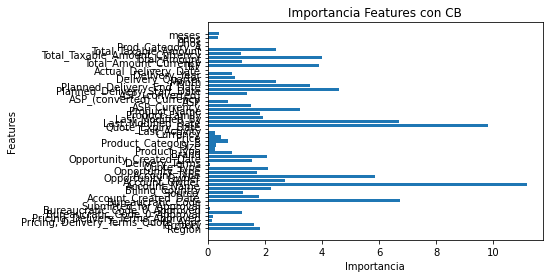

In [ ]:
plt.bar(X2_train.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.title('Importancia Features con CB')
plt.show()

In [ ]:
model.feature_importances_

array([ 1.83268591,  1.60307084,  0.14726304,  0.18027555,  1.20010243,
        0.07520686,  0.        ,  6.72319857,  1.79047654,  1.24298603,
        2.22071123, 11.18517532,  2.70119383,  5.87068965,  1.71426993,
        2.10164073,  0.08843165,  1.52908711,  2.0882847 ,  0.83928793,
        0.25109986,  0.27162423,  0.69710335,  0.47189249,  0.2341182 ,
        0.        ,  9.84114853,  6.718759  ,  1.94636558,  1.81083862,
        3.23597156,  1.50768382,  0.70312913,  0.        ,  1.37328082,
        4.6079605 ,  3.57608269,  2.38447031,  0.95890844,  0.83924337,
        0.        ,  3.90621653,  1.19230632,  4.01625359,  1.17632409,
        2.37465127,  0.        ,  0.        ,  0.36821211,  0.40231773])

In [ ]:
df_test['Opportunity_Created_Date'] = pd.to_datetime(df_test['Opportunity_Created_Date'])
df_test['años'] = df_test['Opportunity_Created_Date'].dt.year
df_test['meses'] = df_test['Opportunity_Created_Date'].dt.month
df_test.sort_values(['años', 'meses'], ascending=True, inplace=True)
df_test = df_test.set_index(df_test['Opportunity_ID'], )
df_test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,años,meses
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10756,17805,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,United States,Account_Name_1632,Opportunity_Name_8631,10756,5667,Person_Name_64,Person_Name_64,Account_Type_0,Opportunity_Type_4,Non Binding,Delivery_Terms_4,2019-01-15,None,None,None,None,None,None,NaT,1/31/2019,1/16/2019,Person_Name_64,Product_Family_168,Product_Name_322,USD,0.455,USD,0.45500,1/25/2019,1/25/2019,2019 - 1,Q1,2019,NaT,0,USD,14414.40,USD,14414.40,Prod_Category_A_None,2019,1
10757,20075,Americas,NE America,0,0,0,0,0,Bureaucratic_Code_4,8/22/2013,Source_7,United States,Account_Name_1737,Opportunity_Name_11250,10757,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2019-01-15,Other,Other,Other,Other,Other,USD,NaT,2/14/2019,3/30/2019,Person_Name_9,Product_Family_213,Product_Name_447,USD,0.420,USD,0.42000,1/29/2019,1/29/2019,2019 - 1,Q1,2019,NaT,0,USD,4851.00,USD,4851.00,Prod_Category_A_None,2019,1
10758,7236,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,3/6/2019,Person_Name_9,Product_Family_213,Product_Name_447,USD,0.390,USD,0.39000,1/15/2019,1/15/2019,2019 - 1,Q1,2019,NaT,0,USD,4504.50,USD,36179.55,Prod_Category_A_None,2019,1
10758,7241,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,3/6/2019,Person_Name_9,Product_Family_162,Product_Name_298,USD,0.470,USD,0.47000,4/15/2019,4/15/2019,2019 - 4,Q2,2019,NaT,0,USD,4885.65,USD,36179.55,Prod_Category_A_None,2019,1
10758,7247,Americas,NE America,1,0,1,0,0,Bureaucratic_Code_5,8/29/2018,None,United States,Account_Name_1635,Opportunity_Name_8862,10758,None,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Non Binding,Delivery_Terms_4,2019-01-16,Other,Other,Size_3,Other,Other,USD,NaT,2/14/2019,3/6/2019,Person_Name_9,Product_Family_168,Product_Name_322,USD,0.460,USD,0.46000,1/15/2019,1/15/2019,2019 - 1,Q1,2019,NaT,0,USD,4857.60,USD,36179.55,Prod_Category_A_None,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364,16345,EMEA,KSA,1,1,0,0,0,Bureaucratic_Code_4,6/12/2017,Source_3,South Africa,Account_Name_1686,Opportunity_Name_11120,12364,6508,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_7,2019-04-26,None,None,None,None,None,None,NaT,5/24/2019,4/26/2019,Person_Name_13,Product_Family_213,Product_Name_447,USD,0.300,USD,0.30000,5/1/2019,5/10/2019,2019 - 5,Q2,2019,NaT,0,USD,124740.00,USD,147750.00,Prod_Category_A_None,2019,4
12365,15218,Americas,SE America,1,1,0,0,0,Bureau

In [ ]:
df_test = df_test.drop('Sales_Contract_No', axis=1)
df_test = df_test.drop('Opportunity_Name', axis=1)
df_test = df_test.drop('ID', axis=1)
df_test = df_test.drop('Opportunity_ID', axis=1)


In [ ]:
columnas = df_x_train.select_dtypes(include='object').columns
columnas

Index(['Region', 'Territory', 'Bureaucratic_Code', 'Account_Created_Date',
       'Source ', 'Billing_Country', 'Account_Name', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B',
       'Price', 'Currency', 'Last_Activity', 'Quote_Expiry_Date',
       'Last_Modified_Date', 'Last_Modified_By', 'Product_Family',
       'Product_Name', 'ASP_Currency', 'ASP_(converted)_Currency',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Actual_Delivery_Date', 'Total_Amount_Currency',
       'Total_Taxable_Amount_Currency', 'Prod_Category_A'],
      dtype='object')

In [ ]:
df_x_train

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Prod_Category_A,Unos,años,meses
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12369,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,Prod_Category_A_None,1,2013,11
12370,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,Prod_Category_A_None,1,2014,3
12371,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,Prod_Category_A_None,1,2014,3
12371,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,Prod_Category_A_None,1,2014,3
12372,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,Prod_Category_A_None,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,Prod_Category_A_None,1,2018,12
11215,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_11,United States,Account_Name_25,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-12-28,None,None,None,None,None,None,NaT,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,

In [ ]:
model2 = CatBoostClassifier(cat_features = columnas)
model2.fit(df_x_train, df_y_train)
preds2 = model2.predict_proba(df_test)

Learning rate set to 0.034439
0:	learn: 0.6677696	total: 133ms	remaining: 2m 13s
1:	learn: 0.6437628	total: 275ms	remaining: 2m 17s
2:	learn: 0.6228615	total: 414ms	remaining: 2m 17s
3:	learn: 0.6046553	total: 555ms	remaining: 2m 18s
4:	learn: 0.5858823	total: 705ms	remaining: 2m 20s
5:	learn: 0.5703100	total: 830ms	remaining: 2m 17s
6:	learn: 0.5569679	total: 970ms	remaining: 2m 17s
7:	learn: 0.5424175	total: 1.11s	remaining: 2m 17s
8:	learn: 0.5305834	total: 1.23s	remaining: 2m 15s
9:	learn: 0.5183744	total: 1.37s	remaining: 2m 15s
10:	learn: 0.5078864	total: 1.5s	remaining: 2m 14s
11:	learn: 0.4978826	total: 1.63s	remaining: 2m 14s
12:	learn: 0.4875734	total: 1.75s	remaining: 2m 13s
13:	learn: 0.4763243	total: 1.88s	remaining: 2m 12s
14:	learn: 0.4656241	total: 2s	remaining: 2m 11s
15:	learn: 0.4555885	total: 2.13s	remaining: 2m 11s
16:	learn: 0.4476598	total: 2.28s	remaining: 2m 11s
17:	learn: 0.4385432	total: 2.4s	remaining: 2m 10s
18:	learn: 0.4304799	total: 2.53s	remaining: 2m 1

KeyboardInterrupt: ignored

In [ ]:
df_x_train

In [ ]:
df_y_train

In [ ]:
res2 = pd.DataFrame(preds2)
resul2 = res2[1]
resul2

In [ ]:
yes2 = pd.Series(df_test.index)
yes2

In [ ]:
resultados2 = pd.concat([yes2, resul2], axis=1).rename(columns={1: 'Target'})
resultados2.head(18)

In [ ]:
res_promedio2 = resultados2.groupby('Opportunity_ID').mean()
res_promedio2.head(70)

In [ ]:
a = res_promedio2.index
a

In [ ]:
a=pd.Series(a)
a

In [ ]:
b = res_promedio2.iloc[:,0]
b.reset_index(inplace = True, drop = True)
b

In [ ]:
final = pd.concat([a, b], axis=1).rename(columns={1: 'Target'})
final

In [ ]:
final.to_csv('resultados.csv', index=False)

In [ ]:
df_test